This notebook records the construction, running and analyses of the outputs from the neural networks I'm going to build. 
In the previous notebook ('The bat detector plan') I detailed the generation of some simulated data with positve example consisting of ultrasonic downward modulated FM chirps, and some negative examples of non batlike calls, with noise, ultrasonic upwards chirps and downward chirps in the audible range. 

I am now going to follow the MNIST example fairly closely in terms of structural choices and see how the network I build performs with a simple and progressively complex structure. Here we go. 

In [1]:
# load the simulated data 
import pickle 
datafile = open('batlike_data.pkl')
all_data = pickle.load(datafile)

In [2]:
training_imgs, training_labels = all_data['training']
testing_imgs, testing_labels = all_data['testing']

In [3]:
# convert the label data into keras compatible format 
from keras.utils import np_utils
testing_labels = np_utils.to_categorical(testing_labels)
training_labels = np_utils.to_categorical(training_labels)

Using TensorFlow backend.


In [4]:
# reshape the image data into a 1d shape per image :
def reshape_imgs_for_network_input(tensor):
    num_imgs, nrows, ncols = tensor.shape
    reshaped_array = tensor.reshape(num_imgs, nrows*ncols)
    return(reshaped_array, nrows, ncols)

In [5]:
training_input_imgs, nrows, ncols = reshape_imgs_for_network_input(training_imgs)
testing_input_imgs, _, _ = reshape_imgs_for_network_input(testing_imgs)

In [6]:
training_input_imgs.shape

(5250, 1947)

In [105]:
nrows*ncols, nrows, ncols

(1947, 33, 59)

In [53]:
# building up the network to be usd : 
import keras 
from keras import models
from keras import layers

In [54]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(nrows*ncols,)))
network.add(layers.Dense(2, activation='softmax'))

In [55]:
# now we compile the network and state its properties 
network.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy'])

In [56]:
network_history = network.fit(training_input_imgs, training_labels
            , epochs=5, batch_size=50, validation_data=(testing_input_imgs, testing_labels))

Train on 5250 samples, validate on 1750 samples
Epoch 1/5
5250/5250 [==============================] - 3s 628us/step - loss: 0.2924 - binary_accuracy: 0.8785 - val_loss: 0.1505 - val_binary_accuracy: 0.9531
Epoch 2/5
5250/5250 [==============================] - 3s 526us/step - loss: 0.0641 - binary_accuracy: 0.9842 - val_loss: 0.0983 - val_binary_accuracy: 0.9686
Epoch 3/5
5250/5250 [==============================] - 3s 540us/step - loss: 0.0194 - binary_accuracy: 0.9973 - val_loss: 0.1109 - val_binary_accuracy: 0.9634
Epoch 4/5
5250/5250 [==============================] - 3s 546us/step - loss: 0.0074 - binary_accuracy: 0.9989 - val_loss: 0.1345 - val_binary_accuracy: 0.9594
Epoch 5/5
5250/5250 [==============================] - 3s 563us/step - loss: 0.0031 - binary_accuracy: 0.9996 - val_loss: 0.1830 - val_binary_accuracy: 0.9554


In [104]:
# save network model after fitting for future use
models.save_model(network, 'batlikecall_detector_v0.h5')

In [57]:
history_dict = network_history.history
history_dict.keys()

['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']

Having gotten a validation accuracy of ~96%, I'm quite surprised, but let's see what's happened over the training. 

In [79]:
%matplotlib notebook

<IPython.core.display.Javascript object>


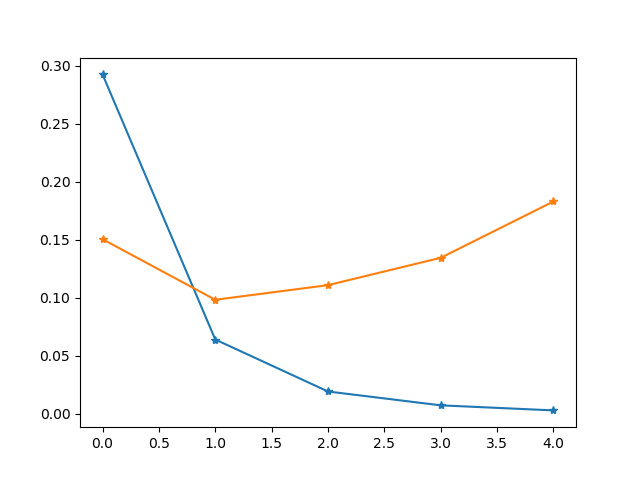

<IPython.core.display.Javascript object>


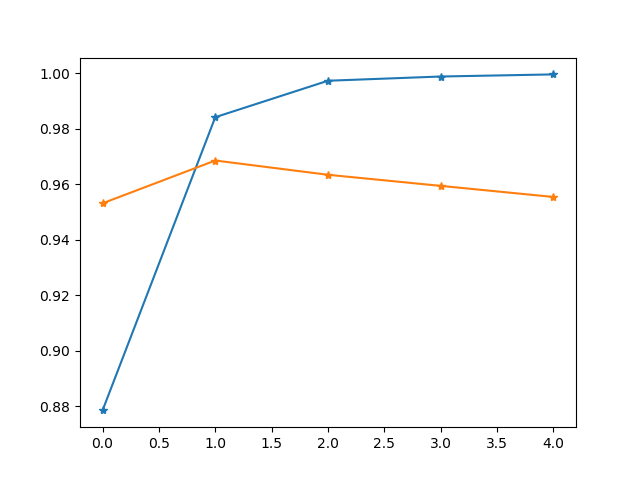

In [80]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

plt.figure()
plt.plot(history_dict['loss'],'-*',label='training loss');
plt.plot(history_dict['val_loss'],'-*',label='validation loss');


plt.figure()
plt.plot(history_dict['binary_accuracy'],'-*',label='training loss');
plt.plot(history_dict['val_binary_accuracy'],'-*',label='validation loss');


<IPython.core.display.Javascript object>


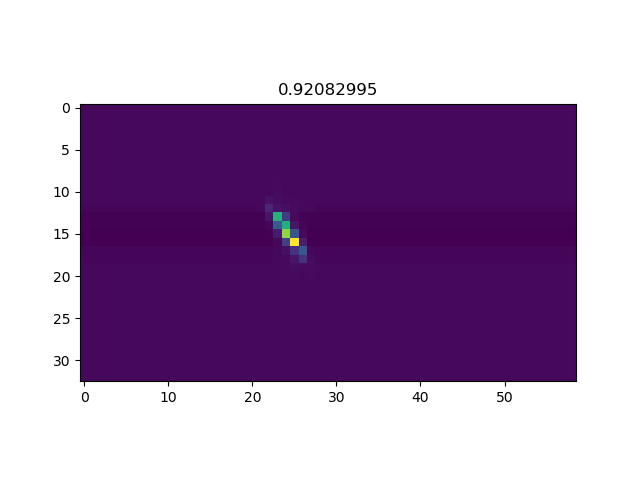

Text(0.5,1,'0.92082995')

In [103]:
plt.figure()
plt.imshow(testing_imgs[150,:,:])
plt.title(network.predict(testing_input_imgs[150:151,:])[0][1])


<IPython.core.display.Javascript object>


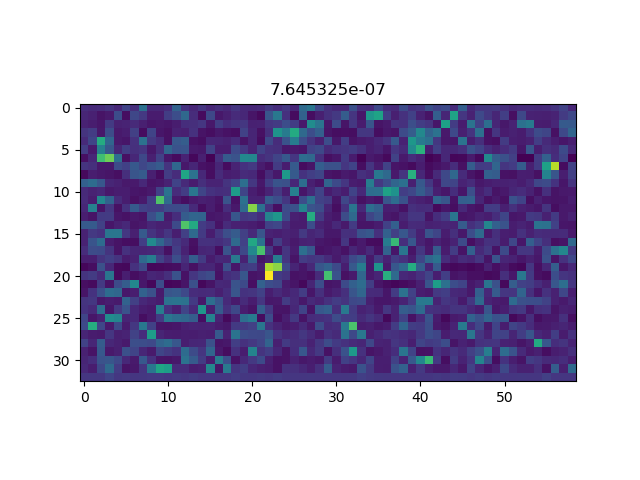

Text(0.5,1,'7.645325e-07')

In [101]:
plt.figure()
plt.imshow(testing_imgs[1201,:,:])
plt.title(network.predict(testing_input_imgs[1200:1201,:])[0][1])


Just for example, we can see that the network has actually managed to classify the sound snippets into those that have and those do not have bat calls. Now, I'm super curious to see what happens if I feed in tiny snippets of an *actual* bat recording from the field. This will however be the topic of the next notebook. 